In [ ]:
import numpy as np
import pandas as pd

# Fonction pour calculer la distance haversine entre deux points géographiques
def haversine(lat1, lon1, lat2, lon2):
    """
    Calcule la distance entre deux points sur la Terre.
    Les coordonnées doivent être en degrés.
    """
    R = 6371  # Rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Essayer de déterminer le séparateur automatiquement
data = pd.read_csv('sncb_prepared.csv', sep=';')


# Filtrer par un type d'incident spécifique (exemple : 14)

for incident_type_to_analyze in data['incident_type'].unique():
    filtered_data = data[data['incident_type'] == incident_type_to_analyze]

    # Obtenir les coordonnées des incidents filtrés
    coordinates = filtered_data[['approx_lat', 'approx_lon']].to_numpy()

    # Calculer la matrice de distances
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = haversine(
                coordinates[i][0], coordinates[i][1],
                coordinates[j][0], coordinates[j][1]
            )

    
    print(f"Type d'incident : {incident_type_to_analyze}")

    # Calculer la moyenne des distances en excluant les zéros de la diagonale
    mean_distance = distance_matrix[np.triu_indices(n, k=1)].mean()  # Moyenne des éléments au-dessus de la diagonale
    print(mean_distance)

    # Extraire les distances au-dessus de la diagonale (sans les zéros)
    distances = distance_matrix[np.triu_indices(len(distance_matrix), k=1)]

    # Calculer l'écart type
    std_dev = np.std(distances)

    #print(f"L'écart type des distances est : {std_dev:.2f} km")


Type d'incident : 4
66.41866388109166
L'écart type des distances est : 47.71 km
Type d'incident : 13
83.41609932018284
L'écart type des distances est : 199.20 km
Type d'incident : 14
113.0363966329334
L'écart type des distances est : 226.77 km
Type d'incident : 2
55.926757026524996
L'écart type des distances est : 39.96 km
Type d'incident : 11
274.8401705465628
L'écart type des distances est : 677.44 km
Type d'incident : 99
131.3407871627754
L'écart type des distances est : 595.56 km
Type d'incident : 9
51.93238283232689
L'écart type des distances est : 37.06 km
Type d'incident : 17
73.53543521046748
L'écart type des distances est : 58.64 km
Type d'incident : 3
88.02199848467737
L'écart type des distances est : 64.79 km
Type d'incident : 16
41.84624151294287
L'écart type des distances est : 17.64 km
Type d'incident : 6
722.2353099238416
L'écart type des distances est : 909.59 km
Type d'incident : 7
112.93930393625571
L'écart type des distances est : 48.00 km


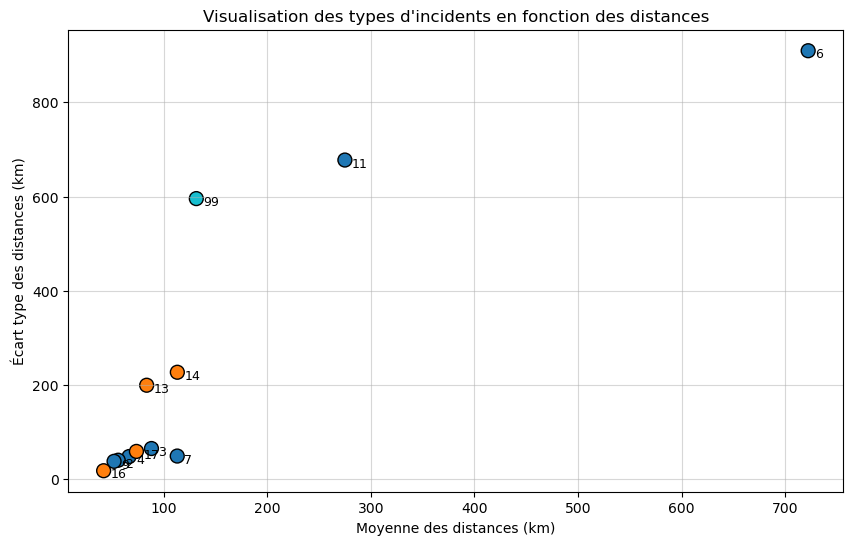

In [13]:
import matplotlib.pyplot as plt

# Exemple de données issues du tableau (à adapter si nécessaire)
incident_types = [4, 13, 14, 2, 11, 99, 9, 17, 3, 16, 6, 7]
mean_distances = [66.41, 83.41, 113.03, 55.92, 274.84, 131.34, 51.93, 73.53, 88.02, 41.84, 722.25, 112.93]
std_devs = [47.71, 199.20, 226.77, 39.96, 677.44, 595.56, 37.60, 58.64, 64.79, 17.64, 909.59, 48.80]

# Tracer un graphique avec les moyennes et écarts types
plt.figure(figsize=(10, 6))
scatter = plt.scatter(mean_distances, std_devs, c=incident_types, cmap='tab10', s=100, edgecolor='k')

# Ajouter des annotations pour chaque point
for i, txt in enumerate(incident_types):
    plt.annotate(txt, (mean_distances[i], std_devs[i]), fontsize=9, xytext=(5, -5), textcoords='offset points')

# Ajouter des labels et un titre
plt.xlabel("Moyenne des distances (km)")
plt.ylabel("Écart type des distances (km)")
plt.title("Visualisation des types d'incidents en fonction des distances")
plt.grid(alpha=0.5)
plt.show()


# Study of the vehicules involved

In [ ]:
data2 = pd.read_csv('sncb_prepared.csv', sep=';')

vehicules_for_keyincident = {}
incident_type_for_keyvehicule = {}
reccurence = []

# Filter by incident type
for incident_type_to_analyze in data2['incident_type'].unique():
    filtered_data = data2[data2['incident_type'] == incident_type_to_analyze]
    vehicules_for_keyincident[incident_type_to_analyze] = []
    # Stock the different vehicules involved in the incidents by type of incident
    incident_type_recurrence = 0
    for data in filtered_data['vehicles_sequence'].unique():
        data = list(data.strip('[]').split(','))
        incident_type_recurrence += 1
        for vehicule in data:
            if vehicule.strip():
                vehicule = int(vehicule)
            else :
                continue
            if vehicule not in vehicules_for_keyincident[incident_type_to_analyze]:
                vehicules_for_keyincident[incident_type_to_analyze].append(vehicule)
            if vehicule not in incident_type_for_keyvehicule:
                incident_type_for_keyvehicule[vehicule] = [(incident_type_to_analyze,1)]
                reccurence.append(incident_type_to_analyze)
            list_incident = list()
            for incident in incident_type_for_keyvehicule[vehicule]:
                list_incident.append(incident[0])
            if incident_type_to_analyze not in list_incident:
                    incident_type_for_keyvehicule[vehicule].append((incident_type_to_analyze,1))
                    reccurence.append(incident_type_to_analyze)
            if incident_type_to_analyze in list_incident and incident_type_recurrence not in reccurence:
                for i in range(len(incident_type_for_keyvehicule[vehicule])):
                    if incident_type_for_keyvehicule[vehicule][i][0] == incident_type_to_analyze:
                        incident_type_for_keyvehicule[vehicule][i] = (incident_type_to_analyze,incident_type_for_keyvehicule[vehicule][i][1]+1)
                        reccurence.append(incident_type_to_analyze)
            
    print(f"Type d'incident : {incident_type_to_analyze} - Nombre de récurrences : {incident_type_recurrence}")
    print(vehicules_for_keyincident[incident_type_to_analyze])


# Print the incidents by vehicule
for key, value in incident_type_for_keyvehicule.items():
    print(f"Véhicule : {key} - Types d'incidents impliqués : {value}")
    

Type d'incident : 4 - Nombre de récurrences : 78
[609, 563, 603, 551, 1078, 508, 689, 1073, 581, 530, 539, 1093, 1014, 1048, 576, 616, 628, 520, 1062, 517, 1086, 694, 523, 511, 505, 535, 1077, 594, 665, 536, 1074, 1082, 1009, 1036, 626, 589, 629, 649, 506, 553, 1079, 555, 623, 528, 688, 1075, 1001, 1033, 708, 1066, 1016, 707, 541, 507, 670, 1004, 593, 621, 706, 632, 658, 591, 614, 659, 684, 625, 1025, 1053, 1008, 1067, 634, 648, 521, 700, 660, 598, 537, 1005, 1011, 1038, 1041, 687, 1032, 510, 587, 611, 620, 503, 545, 1015, 672, 698, 516, 558, 585, 533, 1058, 529, 531, 518, 1069, 1083, 690, 664, 710, 543, 1023, 1043, 571, 1042, 607, 636, 570, 677, 679, 560, 627, 656, 631, 619, 647]
Type d'incident : 13 - Nombre de récurrences : 316
[526, 1094, 578, 648, 657, 1016, 1002, 1011, 511, 682, 1077, 573, 654, 696, 1085, 1086, 1010, 622, 1005, 1073, 1082, 510, 520, 1058, 504, 1041, 506, 673, 684, 607, 580, 1027, 601, 1088, 572, 631, 629, 570, 608, 517, 542, 1001, 1019, 1014, 537, 1066, 1078, 671

In [45]:
import pandas as pd

# Chargement des données
data2 = pd.read_csv('sncb_prepared.csv', sep=';')

# Dictionnaires pour stocker les informations
vehicles_by_incident_type = {}
incident_types_by_vehicle = {}

# Parcours des types d'incidents uniques
for incident_type in data2['incident_type'].unique():
    # Filtrer les données pour le type d'incident courant
    filtered_data = data2[data2['incident_type'] == incident_type]
    vehicles_by_incident_type[incident_type] = set()  # Utiliser un ensemble pour éviter les doublons
    incident_count = 0

    for vehicle_sequence in filtered_data['vehicles_sequence'].unique():
        # Transformation de la séquence en liste d'entiers
        vehicles = [int(v.strip()) for v in vehicle_sequence.strip('[]').split(',') if v.strip()]
        incident_count += 1
        vehicles_visited = {}
        for vehicle in vehicles:
            if vehicle not in vehicles_visited:
                vehicles_visited[vehicle] = False
            vehicles_by_incident_type[incident_type].add(vehicle)

            # Initialiser le dictionnaire des types d'incidents pour un véhicule
            if vehicle not in incident_types_by_vehicle:
                incident_types_by_vehicle[vehicle] = {}

            # Mettre à jour le compteur pour le type d'incident
            if incident_type not in incident_types_by_vehicle[vehicle]:
                incident_types_by_vehicle[vehicle][incident_type] = 0
            if  not vehicles_visited[vehicle]:
                incident_types_by_vehicle[vehicle][incident_type] += 1
                vehicles_visited[vehicle] = True

    # Afficher les informations pour le type d'incident
    print(f"Type d'incident : {incident_type} - Nombre de récurrences : {incident_count}")
    print(f"Véhicules impliqués : {sorted(vehicles_by_incident_type[incident_type])}")

# Afficher les incidents par véhicule
for vehicle, incidents in incident_types_by_vehicle.items():
    incidents_summary = ', '.join([f"{incident} ({count})" for incident, count in incidents.items()])
    print(f"Véhicule : {vehicle} - Types d'incidents impliqués : {incidents_summary}")



Type d'incident : 4 - Nombre de récurrences : 78
Véhicules impliqués : [503, 505, 506, 507, 508, 510, 511, 516, 517, 518, 520, 521, 523, 528, 529, 530, 531, 533, 535, 536, 537, 539, 541, 543, 545, 551, 553, 555, 558, 560, 563, 570, 571, 576, 581, 585, 587, 589, 591, 593, 594, 598, 603, 607, 609, 611, 614, 616, 619, 620, 621, 623, 625, 626, 627, 628, 629, 631, 632, 634, 636, 647, 648, 649, 656, 658, 659, 660, 664, 665, 670, 672, 677, 679, 684, 687, 688, 689, 690, 694, 698, 700, 706, 707, 708, 710, 1001, 1004, 1005, 1008, 1009, 1011, 1014, 1015, 1016, 1023, 1025, 1032, 1033, 1036, 1038, 1041, 1042, 1043, 1048, 1053, 1058, 1062, 1066, 1067, 1069, 1073, 1074, 1075, 1077, 1078, 1079, 1082, 1083, 1086, 1093]
Type d'incident : 13 - Nombre de récurrences : 316
Véhicules impliqués : [501, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 541, 542, 543, 544, 545, 547,